In [1]:
"""
The beginning of this notebook will import dataframes then create additional dataframes
that will be used to compare 2021 and 2022, and combine the imported dataframes to make
new insights (eg desirability)

Afterwards there will be charts and graphs analyzing the data
"""

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

"""
Importing these dataframes created by the create_data_frames notebook:
   -nameID weekly sales: item nameIDs on the rows, date of the delivery on the columns,
   total income for that item on that week in the cells
   -nameID weekly item count: item nameIDs on the rows, date of the delivery on the columns,
   total count sold for that item on that week in the cells
   -nameID weekly availability: same rows and columns, but the data is a 1 or 0 for
   whether or not the item was available that week
   -userID weekly sales: a dictionary where the key is the userID, and the value is
   a nameID weekly sales frame for that specific user
   -userID weekly item count: a dictionary where the key is the userID, and the value is
   a nameID weekly item count frame for that specific user
   -weekly delivery count: a dictionary where the key is week and the value is the number
   of deliveries for that week
   -userID weekly CSA sales: a multi-indexed dataframe where levelOne is the userID,
   levelTwo is the point-of-sale (p/d/m) and each column is a date
   -external weekly sales: the rows are the point-of-sale (eg. Cumberland, Frostburg)
   and the columns are the dates
   -userID renewal: rows are the userIDs and there's a column for 2021 and 2022 total renewal
   amount and end of year balance

"""


#read files
ef1 = pd.ExcelFile('data_frames/nameID_weekly_sales_frame.xlsx')
ef2 = pd.ExcelFile('data_frames/nameID_weekly_count_frame.xlsx')
ef3 = pd.ExcelFile('data_frames/nameID_weekly_avail_frame.xlsx')
ef4 = pd.ExcelFile('data_frames/weekly_delivery_count_frame.xlsx')
ef5 = pd.ExcelFile('data_frames/userID_weekly_sales_frame_dictionary.xlsx')
ef6 = pd.ExcelFile('data_frames/userID_weekly_count_frame_dictionary.xlsx')
ef7 = pd.ExcelFile('data_frames/csa_profile.xlsx')
ef8 = pd.ExcelFile('data_frames/weekly_external_sales.xlsx')
ef9 = pd.ExcelFile('data_frames/csa_renewal.xlsx')



#creating dataframes from the excel files with a single sheet
nameID_weekly_sales_frame = ef1.parse(sheet_name='Sheet1', index_col=[0,1,2,3,4], parse_dates=True)
nameID_weekly_count_frame = ef2.parse(sheet_name='Sheet1', index_col=[0,1,2,3,4], parse_dates=True)
nameID_weekly_avail_frame = ef3.parse(sheet_name='Sheet1', index_col=[0,1,2,3,4], parse_dates=True)
weekly_delivery_count_frame = ef4.parse(sheet_name='Sheet1', index_col=0, parse_dates=True)
userID_weekly_csa_sales_frame = ef7.parse(sheet_name='Sheet1', header=[0,1], index_col=0, parse_dates=True)
external_weekly_sales_frame = ef8.parse(sheet_name='Sheet1', index_col=0, parse_dates=True)
userID_renewal_frame = ef9.parse(sheet_name='Sheet1', index_col=0)

#set index for each dataframe as nameID, type, category, and subcategory
#nameID_weekly_sales_frame = nameID_weekly_sales_frame.set_index(['Unnamed: 0', 'nameID', 'type', 'category', 'subcategory'])
#nameID_weekly_count_frame = nameID_weekly_count_frame.set_index(['Unnamed: 0', 'nameID', 'type', 'category', 'subcategory'])
#nameID_weekly_avail_frame = nameID_weekly_avail_frame.set_index(['Unnamed: 0', 'nameID', 'type', 'category', 'subcategory'])

#creating dictionary of dataframes where the key is the userID
#and the values is a dataframe similar to nameID_weekly_sales_frame
#and nameID_weekly_count_frame, but for that specific user
#also setting index for each dataframe like above
userID_weekly_sales_frame_dictionary = {}
userID_weekly_count_frame_dictionary = {}

for userID in ef5.sheet_names:
    userID_weekly_sales_frame_dictionary[userID] = ef5.parse(sheet_name=userID, index_col=[0,1,2,3,4], parse_dates=True)
    #userID_weekly_sales_frame_dictionary[userID] = userID_weekly_sales_frame_dictionary[userID].set_index(['Unnamed: 0', 'nameID', 'type', 'category', 'subcategory'])
    
for userID in ef6.sheet_names:
    userID_weekly_count_frame_dictionary[userID] = ef6.parse(sheet_name=userID, index_col=[0,1,2,3,4], parse_dates=True)    
    #userID_weekly_count_frame_dictionary[userID] = userID_weekly_count_frame_dictionary[userID].set_index(['Unnamed: 0', 'nameID', 'type', 'category', 'subcategory'])


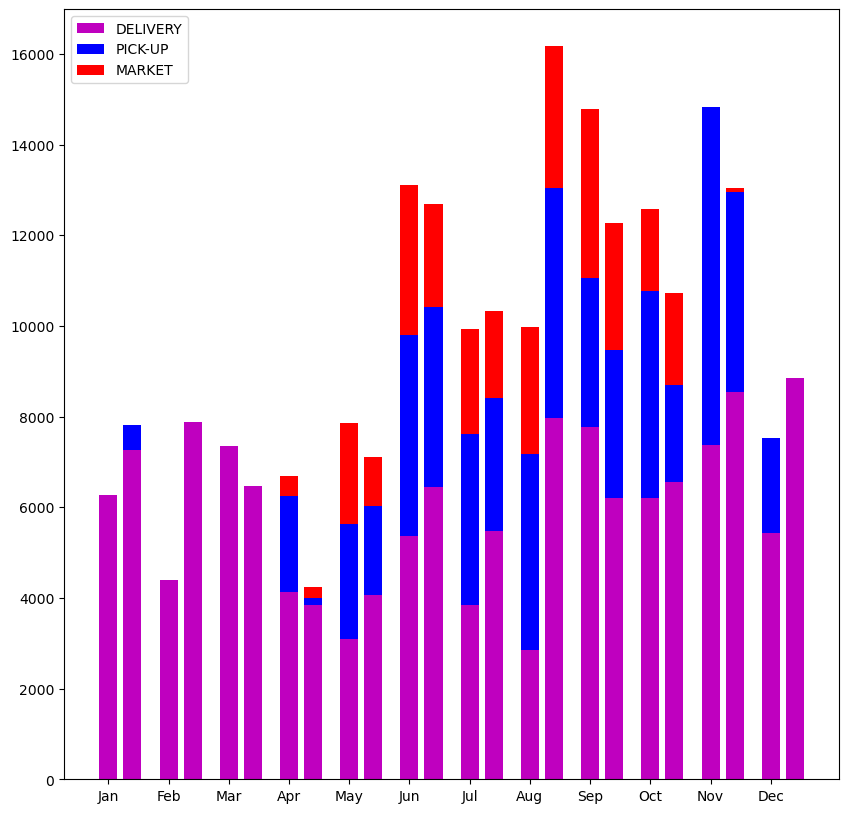

In [2]:
weekly_csa_sales_sum = userID_weekly_csa_sales_frame.sum(axis=0)


y1m = {'d' : [0,0,0,0,0,0,0,0,0,0,0,0],
     'p' : [0,0,0,0,0,0,0,0,0,0,0,0],
     'm' : [0,0,0,0,0,0,0,0,0,0,0,0]}


y2m = {'d' : [0,0,0,0,0,0,0,0,0,0,0,0],
     'p' : [0,0,0,0,0,0,0,0,0,0,0,0],
     'm' : [0,0,0,0,0,0,0,0,0,0,0,0]}



for week, val in weekly_csa_sales_sum.items():
    if week[0].year == 2021:
        y1m[week[1]][(week[0].month-1)] += val
    elif week[0].year == 2022:
        y2m[week[1]][(week[0].month-1)] += val

        
names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


y1mdp = [x + y for x, y in zip(y1m['d'], y1m['p'])]
y1mTotal = [x + y for x, y in zip(y1mdp, y1m['m'])]

            
ind = np.arange(12)


width = 0.3

fig, ax = plt.subplots(figsize = (10,10))

y1md = ax.bar(ind, y1m['d'], width, color = 'm', label = 'DELIVERY')

y1mp = ax.bar(ind, y1m['p'], width, bottom = y1m['d'], color = 'b', label = 'PICK-UP')

y1mm = ax.bar(ind, y1m['m'], width, bottom = y1mdp, color = 'r', label = 'MARKET')


##################################

y2mdp = [x + y for x, y in zip(y2m['d'], y2m['p'])]
y2mTotal = [x + y for x, y in zip(y2mdp, y2m['m'])]

y2md = ax.bar(ind + width + 0.1, y2m['d'], width, color = 'm', label = '_DELIVERY')

y2mp = ax.bar(ind + width + 0.1, y2m['p'], width, bottom = y2m['d'], color = 'b', label = '_PICK-UP')

y2mm = ax.bar(ind + width + 0.1, y2m['m'], width, bottom = y2mdp, color = 'r', label = '_MARKET')


allBars = [y1md,y1mp,y1mm,y2md,y2mp,y2mm]

ax.legend(loc=2)
    

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(bar):
    x = bar.get_x()
    rX = round(x - int(x))
    week = int(round(x))
    if rX == 1:
        name = names[week] + " 2021"
        otherName = "2022"
        weekTotal = round(y1mTotal[week])
        mT = round(y1m['m'][week])
        pT = round(y1m['p'][week])
        dT = round(y1m['d'][week])
        lastYearTotal = round(y2mTotal[week])
        lmT = round(y2m['m'][week])
        lpT = round(y2m['p'][week])
        ldT = round(y2m['d'][week])
    else:
        name = names[week] + " 2022"
        otherName = "2021"
        weekTotal = round(y2mTotal[week])
        mT = round(y2m['m'][week])
        pT = round(y2m['p'][week])
        dT = round(y2m['d'][week])
        lastYearTotal = round(y1mTotal[week])
        lmT = round(y1m['m'][week])
        lpT = round(y1m['p'][week])
        ldT = round(y1m['d'][week])
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text1 = "{} \nMonth Total = {} \nMarket = {} \nPick-Up = {} \nDelivery = {}\n----------".format(name,weekTotal, mT, pT, dT)
    text2 = "\n{} Month Total = {} \nMarket = {} \nPick-up = {} \nDelivery = {}".format(otherName, lastYearTotal, lmT, lpT, ldT)
    text = text1 + text2
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor("white")
    annot.get_bbox_patch().set_alpha(0.9)


def on_click(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bars in allBars:
            for bar in bars:
                cont, ind = bar.contains(event)
                if cont:
                    update_annot(bar)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                    return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

plt.connect('button_press_event', on_click)

ax.set_xticks(ind, names)


# function to show the plot
plt.show()



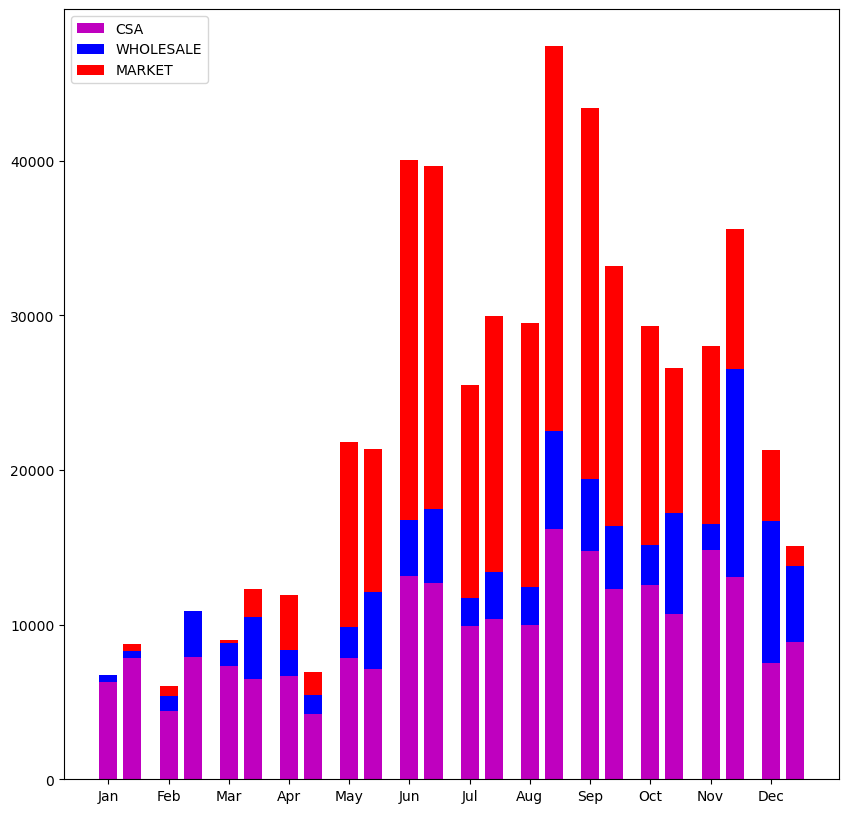

In [3]:
y1csa = [round(x + y + z) for x, y, z in zip(y1m['d'], y1m['p'], y1m['m'])]

y2csa = [round(x + y + z) for x, y, z in zip(y2m['d'], y2m['p'], y2m['m'])]

y1wholesale = [0,0,0,0,0,0,0,0,0,0,0,0]

y2wholesale = [0,0,0,0,0,0,0,0,0,0,0,0]

for week, total in external_weekly_sales_frame.loc['Wholesale'].fillna(0).items():
    if week.year == 2021:
        y1wholesale[week.month-1]+=round(total)
    elif week.year == 2022:
        y2wholesale[week.month-1]+=round(total)   
 
y1Overallmarket = [0,0,0,0,0,0,0,0,0,0,0,0]
y2Overallmarket = [0,0,0,0,0,0,0,0,0,0,0,0]
for week, total in external_weekly_sales_frame.loc['Cumberland':'Berkeley Springs'].fillna(0).items():
    if week.year == 2021:
        y1Overallmarket[week.month-1]+=round(total.sum())
    elif week.year == 2022:
        y2Overallmarket[week.month-1]+=round(total.sum())   

y1Overall = {'c' : y1csa,
          'w' : y1wholesale,
            'm' : y1Overallmarket}

y2Overall = {'c' : y2csa,
          'w' : y2wholesale,
            'm' : y2Overallmarket}


names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


y1Overallcw = [x + y for x, y in zip(y1Overall['c'], y1Overall['w'])]
y1OverallTotal = [x + y for x, y in zip(y1Overallcw, y1Overall['m'])]

            
ind = np.arange(12)


width = 0.3

fig, ax = plt.subplots(figsize = (10,10))

y1Overallc = ax.bar(ind, y1Overall['c'], width, color = 'm', label = 'CSA')

y1Overallw = ax.bar(ind, y1Overall['w'], width, bottom = y1Overall['c'], color = 'b', label = 'WHOLESALE')

y1Overallm = ax.bar(ind, y1Overall['m'], width, bottom = y1Overallcw, color = 'r', label = 'MARKET')


##################################

y2Overallcw = [x + y for x, y in zip(y2Overall['c'], y2Overall['w'])]
y2OverallTotal = [x + y for x, y in zip(y2Overallcw, y2Overall['m'])]

y2Overallc = ax.bar(ind + width + 0.1, y2Overall['c'], width, color = 'm', label = '_CSA')

y2Overallw = ax.bar(ind + width + 0.1, y2Overall['w'], width, bottom = y2Overall['c'], color = 'b', label = '_WHOLESALE')

y2Overallm = ax.bar(ind + width + 0.1, y2Overall['m'], width, bottom = y2Overallcw, color = 'r', label = '_MARKET')


allBars = [y1Overallc,y1Overallw,y1Overallm,y2Overallc,y2Overallw,y2Overallm]

ax.legend(loc=2)
    

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(bar):
    x = bar.get_x()
    rX = round(x - int(x))
    week = int(round(x))
    if rX == 1:
        name = names[week] + " 2021"
        otherName = "2022"
        weekTotal = round(y1OverallTotal[week])
        mT = round(y1Overall['m'][week])
        wT = round(y1Overall['w'][week])
        cT = round(y1Overall['c'][week])
        lastYearTotal = round(y2OverallTotal[week])
        lmT = round(y2Overall['m'][week])
        lwT = round(y2Overall['w'][week])
        lcT = round(y2Overall['c'][week])
    else:
        name = names[week] + " 2022"
        otherName = "2021"
        weekTotal = round(y2OverallTotal[week])
        mT = round(y2Overall['m'][week])
        wT = round(y2Overall['w'][week])
        cT = round(y2Overall['c'][week])
        lastYearTotal = round(y1OverallTotal[week])
        lmT = round(y1Overall['m'][week])
        lwT = round(y1Overall['w'][week])
        lcT = round(y1Overall['c'][week])
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text1 = "{} \nMonth Total = {} \nMarket = {} \nWholesale = {} \nCSA = {}\n----------".format(name,weekTotal, mT, wT, cT)
    text2 = "\n{} Month Total = {} \nMarket = {} \nWholesale-up = {} \nCSA = {}".format(otherName, lastYearTotal, lmT, lwT, lcT)
    text = text1 + text2
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor("white")
    annot.get_bbox_patch().set_alpha(0.9)


def on_click(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bars in allBars:
            for bar in bars:
                cont, ind = bar.contains(event)
                if cont:
                    update_annot(bar)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                    return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

plt.connect('button_press_event', on_click)

ax.set_xticks(ind, names)

# function to show the plot
plt.show()
    
